# WeatherPy
----

### Analysis
* The relationship between latitude and maximum temperature is negative with the highest temperatures closest to the equator. A correlation between latitude and maximum termperature was calculated and is -0.75 which is a fairly strong correlation.  Because the graph reveals a curvilinear relationship the absoulte value of the latitude was created.  A correlation between the absolute value of the latitude and maximum temperature is -0.86.  This indicates that as the lattitude increases the maximum temperature decreases.
* There is a weak relationship between latitude and cloudiness and the absolute value of latitude and cloudiness (correlations of 0.14 and 0.18 respectively).
* There appears to be no/minimal relationship betwen latitude and humidity and latitude and wind speed.  

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

750

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print(f"Processing Record {record} | {city_record} | Not found...skipping record")
        record = record + 1
    continue
    


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=mataura
Processing Record 2 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=vaini
Processing Record 3 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=ponta%20do%20sol
Processing Record 4 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=east%20london
Processing Record 5 | Flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=flinders
Processing Record 6 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=kapaa
Processing Record 7 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?

Processing Record 63 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=katsuura
Processing Record 64 | Dunmore Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=dunmore%20town
Processing Record 65 | Caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=caravelas
Processing Record 66 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=souillac
Processing Record 67 | Seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=seoul
Processing Record 68 | Brownsville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=brownsville
Processing Record 69 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f569

Processing Record 122 | Inuvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=inuvik
Processing Record 123 | Uruzgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=uruzgan
Processing Record 124 | Zaysan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=zaysan
Processing Record 125 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=coquimbo
Processing Record 126 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=kruisfontein
Processing Record 127 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=touros
Processing Record 128 | Krasnyy Yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b

Processing Record 180 | Shenzhen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=shenzhen
Processing Record 181 | Zhezkazgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=zhezkazgan
Processing Record 182 | Georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=georgetown
Processing Record 183 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=codrington
Processing Record 184 | Los Andes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=los%20andes
Processing Record 185 | Los Andes | Not found...skipping record
Processing Record 186 | Volodarsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=volodarsk
Processing Record 187 | Fortuna
http://api.openw

Processing Record 240 | Kroya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=kroya
Processing Record 241 | Ngunguru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=ngunguru
Processing Record 242 | Riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=riyadh
Processing Record 243 | Yueyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=yueyang
Processing Record 244 | Bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=bud
Processing Record 245 | Coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=coahuayana
Processing Record 246 | Greytown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=greytown
Pro

Processing Record 302 | ChengDe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=chengde
Processing Record 303 | ChengDe | Not found...skipping record
Processing Record 304 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=ancud
Processing Record 305 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=faya
Processing Record 306 | Rognan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=rognan
Processing Record 307 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=ixtapa
Processing Record 308 | Ixtapa | Not found...skipping record
Processing Record 309 | Zatoka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=zatoka
Processing Record 310 | Redlands
ht

Processing Record 362 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=provideniya
Processing Record 363 | Muyezerskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=muyezerskiy
Processing Record 364 | Yabrud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=yabrud
Processing Record 365 | Waingapu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=waingapu
Processing Record 366 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=tiksi
Processing Record 367 | Borogontsy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=borogontsy
Processing Record 368 | Puerto Narino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5

Processing Record 421 | Manaure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=manaure
Processing Record 422 | Puerto Penasco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=puerto%20penasco
Processing Record 423 | Havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=havoysund
Processing Record 424 | Mackay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=mackay
Processing Record 425 | Jablah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=jablah
Processing Record 426 | Jablah | Not found...skipping record
Processing Record 427 | Vanavara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=vanavara
Processing Record 428 | Opole Lubelskie
http://api.openweatherm

Processing Record 482 | Weare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=weare
Processing Record 483 | Saint Anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=saint%20anthony
Processing Record 484 | Buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=buraydah
Processing Record 485 | Neiafu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=neiafu
Processing Record 486 | Neiafu | Not found...skipping record
Processing Record 487 | Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=broome
Processing Record 488 | Broome | Not found...skipping record
Processing Record 489 | Broome | Not found...skipping record
Processing Record 490 | Synya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 543 | Brigantine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=brigantine
Processing Record 544 | Brigantine | Not found...skipping record
Processing Record 545 | Chamonix-Mont-Blanc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=chamonix-mont-blanc
Processing Record 546 | Kananga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=kananga
Processing Record 547 | Russellville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=russellville
Processing Record 548 | Taketa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=taketa
Processing Record 549 | Henderson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=henderson
Processing Record 550 | Norsup
http

Processing Record 602 | Aden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=aden
Processing Record 603 | Abu Dhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=abu%20dhabi
Processing Record 604 | Abu Dhabi | Not found...skipping record
Processing Record 605 | Roswell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=roswell
Processing Record 606 | Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=kirakira
Processing Record 607 | Kanniyakumari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=kanniyakumari
Processing Record 608 | Kayerkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=kayerkan
Processing Record 609 | Byron Bay
http://api.openweathermap.or

Processing Record 661 | Ogbomosho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=ogbomosho
Processing Record 662 | Pathein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=pathein
Processing Record 663 | Pathein | Not found...skipping record
Processing Record 664 | Pathein | Not found...skipping record
Processing Record 665 | Muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=muros
Processing Record 666 | Minbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=minbu
Processing Record 667 | Shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=shimoda
Processing Record 668 | Dongsheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=dongsheng
Processing Record 

Processing Record 721 | Chumphon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=chumphon
Processing Record 722 | Yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=yumen
Processing Record 723 | Yumen | Not found...skipping record
Processing Record 724 | Zabaykalsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=zabaykalsk
Processing Record 725 | Zabaykalsk | Not found...skipping record
Processing Record 726 | Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=margate
Processing Record 727 | Magadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=magadan
Processing Record 728 | Beisfjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d325fc954637b191f5695d876139824b&q=beisfjord
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Getting rid of outliers on humidity
weather_data = weather_data.loc[weather_data.loc[:, 'Humidity'] < 101, :] 

# Creating variable that contains the absolute value of latitude since relationship is somewhat curvilinear
weather_data['AV Latitude'] = weather_data['Lat'].abs()

#Save file to CSV
weather_data.to_csv("weather_data.csv")

# Display count of weather data values 
weather_data.count()

City           671
Cloudiness     671
Country        671
Date           671
Humidity       671
Lat            671
Lng            671
Max Temp       671
Wind Speed     671
AV Latitude    671
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

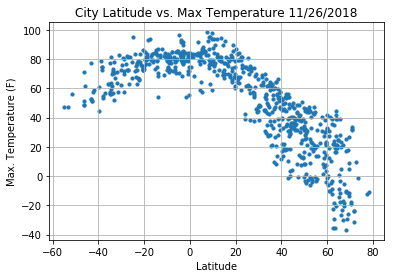

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature 11/26/2018")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

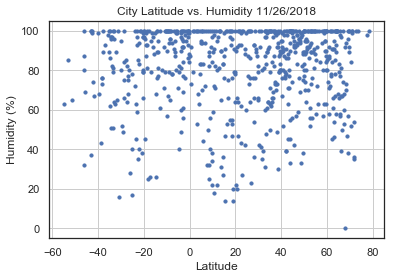

In [15]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity 11/26/2018")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

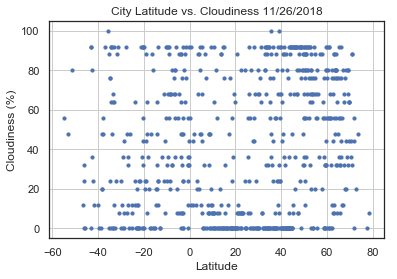

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness 11/26/2018")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

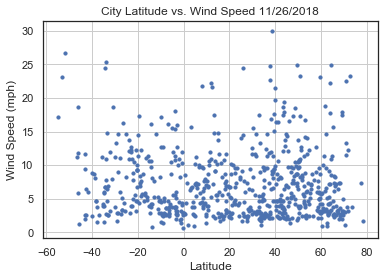

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed 11/26/2018")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

In [18]:
# Estimate and display correlation matrix
corr = weather_data.corr()
print(corr)

             Cloudiness      Date  Humidity       Lat       Lng  Max Temp  \
Cloudiness     1.000000 -0.023146  0.320206  0.149000 -0.005976 -0.142368   
Date          -0.023146  1.000000 -0.019171  0.088232  0.154813  0.001234   
Humidity       0.320206 -0.019171  1.000000  0.040968 -0.020837  0.039236   
Lat            0.149000  0.088232  0.040968  1.000000 -0.000869 -0.752616   
Lng           -0.005976  0.154813 -0.020837 -0.000869  1.000000 -0.128797   
Max Temp      -0.142368  0.001234  0.039236 -0.752616 -0.128797  1.000000   
Wind Speed     0.071986 -0.103313  0.083368 -0.032728 -0.149688  0.131984   
AV Latitude    0.183161 -0.073037  0.018722  0.704467  0.033513 -0.862074   

             Wind Speed  AV Latitude  
Cloudiness     0.071986     0.183161  
Date          -0.103313    -0.073037  
Humidity       0.083368     0.018722  
Lat           -0.032728     0.704467  
Lng           -0.149688     0.033513  
Max Temp       0.131984    -0.862074  
Wind Speed     1.000000     0.051

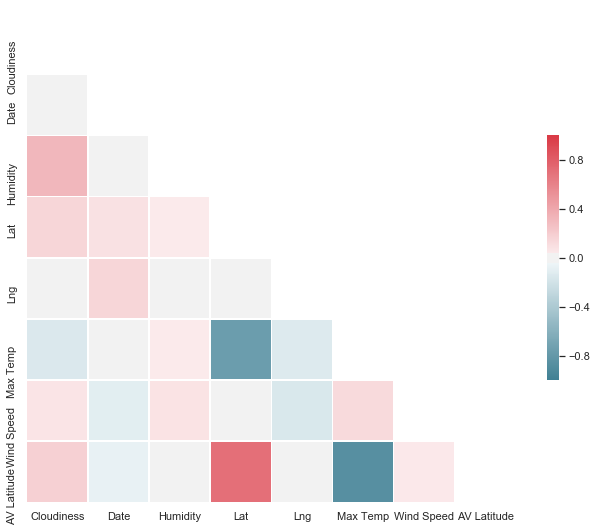

In [19]:
#Plot correlation matrix as graph

sns.set(style="white")
corr = weather_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1.0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

